In [1]:
from __future__ import print_function
from pathlib import Path
import functools as fn
import math
import statistics as stat
import sys, os
import pandas as pd
import numpy as np

import nilmtk
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')

from src.utils import paths_manager as pathsman
from src.data_processing.sequence_scanning import scan_sequences

In [2]:
rcParams['figure.figsize'] = (17, 6)
start_time = "2015-01-01"
end_time = "2015-03-30"
end_time = "2016-01-01"

In [3]:
train_dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)
train_dataset.set_window(start=start_time, end=end_time)

In [4]:
BUILDING = 1
FRIDGE_FREEZER = "fridge freezer"
KETTLE = "kettle"
DISHWASHER = "dish washer"
MICROWAVE = "microwave"
WASHER_DRYER = "washer dryer"

applist = [FRIDGE_FREEZER, KETTLE, DISHWASHER, MICROWAVE, WASHER_DRYER]

In [5]:
train_elec = train_dataset.buildings[BUILDING].elec

In [6]:
print(f"Activation stats in the period [{start_time}, {end_time}]")
row = []

for app in applist:
    col = []
    app_name = app.upper()
    activations = train_elec[app].get_activations()
    total_num = len(activations)
    average_length = stat.mean(map(len, activations))
    col.append(total_num)
    col.append(average_length)
    row.append(col)

pd.DataFrame(row, columns=["No. of Activations", "Average Length"], index=applist)

Activation stats in the period [2015-01-01, 2016-01-01]


,No. of Activations,Average Length
fridge freezer,9026,243.504653
kettle,1614,24.190830
dish washer,164,1077.371951
microwave,2406,18.137157
washer dryer,336,934.693452


In [7]:
def visualize_activation(appliance, num_acts=None, ylim=None):
        activations = train_elec[appliance].get_activations()

        num_acts = num_acts or 1

        for activation in activations[:num_acts]:
                activation.plot()
                plt.ylim(*(ylim or (-10, 2500))) 

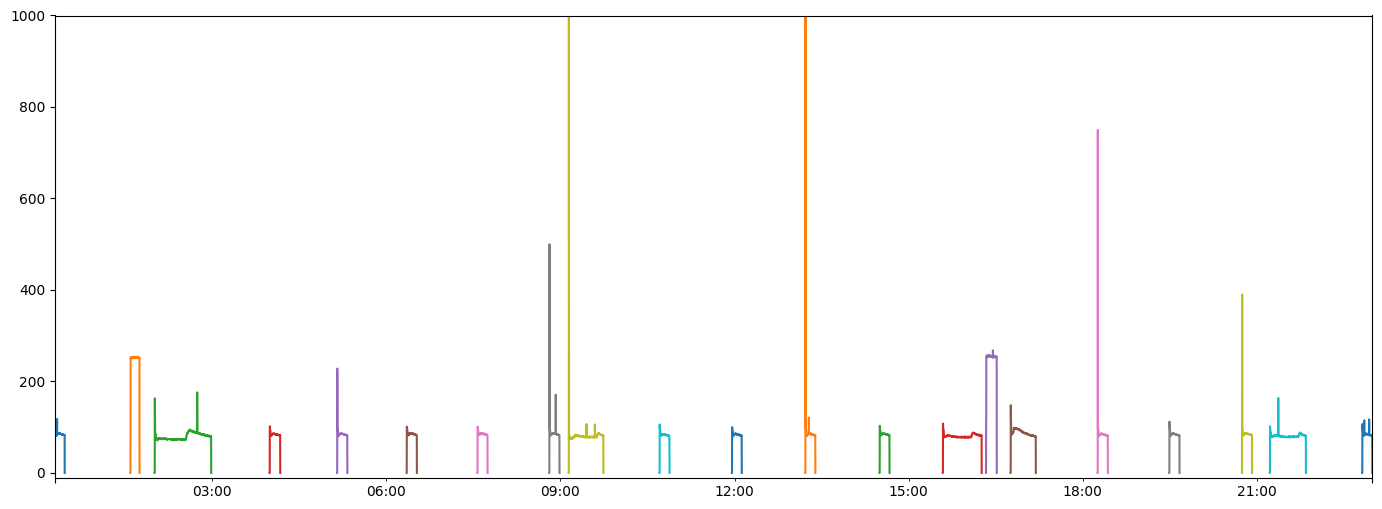

In [8]:
visualize_activation(FRIDGE_FREEZER, num_acts=21, ylim=(-10, 1000))

In [13]:
dw_activations = train_elec[DISHWASHER].get_activations()
ff_activations = train_elec[FRIDGE_FREEZER].get_activations()
mw_activations = train_elec[MICROWAVE].get_activations()
kt_activations = train_elec[KETTLE].get_activations()
wm_activations = train_elec[WASHER_DRYER].get_activations()

In [20]:
dw_seq = []
for activation in dw_activations:
        dw = scan_sequences(np.array(activation), seq_len=100, num_windows=20, mode="window")
        dw_seq = dw_seq + dw

len(dw_seq)

3116

In [36]:
ff_seq = []
for activation in ff_activations:
        ff = scan_sequences(np.array(activation), seq_len=100, num_windows=1, mode="window")
        ff_seq = ff_seq + ff

len(ff_seq)

9026

In [19]:
wm_seq = []
for activation in wm_activations:
        wm = scan_sequences(np.array(activation), seq_len=100, num_windows=15, mode="window")
        wm_seq = wm_seq + wm

len(wm_seq)

4682

In [27]:
kt_seq = []
for activation in kt_activations:
        kt = scan_sequences(np.array(activation), seq_len=100, num_windows=1, mode="window")
        kt_seq = kt_seq + kt

len(kt_seq)

1614

In [28]:
mw_seq = []
for activation in mw_activations:
        mw = scan_sequences(np.array(activation), seq_len=100, num_windows=1, mode="window")
        mw_seq = mw_seq + mw

len(mw_seq)

2406